In [6]:
# import needed libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns

############################################ FEATURE SELECTION ############################################
#!pip install scipy
import scipy.stats as stats
from scipy.stats import chi2_contingency # filter method
from sklearn.feature_selection import RFE # wrapper method
from sklearn.linear_model import LogisticRegression #(This is one possible model to apply inside RFE)
from sklearn.linear_model import LassoCV # embedded method
from sklearn.tree import DecisionTreeClassifier # embedded method
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.feature_selection import mutual_info_classif as MIC

import warnings
warnings.filterwarnings('ignore')

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

############################################## PREPROCESSING ##############################################
from sklearn.preprocessing import MinMaxScaler

################################################# MODELS ##################################################
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE

################################################# METRICS #################################################
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import precision_recall_curve
from tqdm import tqdm

################################### MODEL SELECTION & OPTIMIZATION ########################################
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import ParameterGrid
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

######################################### DECISION TREES PLOTS ############################################
# in anaconda prompt: conda install python-graphviz
#!pip install pydotplus
from sklearn.tree import export_graphviz
import graphviz
import pydotplus

<a class="anchor" id="1st-bullet">

# 1. Import data (Data Integration)

</a>

In [8]:
df = pd.read_parquet(r'Datasets\\parquet\\bank_feature_selection.parquet')

y = df['y']
X_reduced = df.drop(['y'], axis=1).copy()

X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.3, stratify=y, random_state=100)
smote = SMOTE(random_state=100)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Building a predictive model - Part II

[4. Model & Assess (Modelling and Assessment)](#17th-bullet)<br>
- [4.1. Model Selection](#18th-bullet)<br>
    - [4.1.1. Compare different algorithms and select the most promising ones](#19th-bullet)<br>
- [4.2. Model Optimization](#20th-bullet)<br>
    - [4.2.1. K-Nearest Neighbors](#21st-bullet)<br>
    - [4.2.2. Decision Trees](#22nd-bullet)<br>
        - [4.2.2.1. How to visualize decision trees](#23rd-bullet)<br>
    - [4.2.3. Neural Networks](#24th-bullet)<br>
    - [4.2.4. Random Forest](#25th-bullet)<br>
    - [4.2.5. Gradient Boosting](#26th-bullet)<br>
    - [4.2.6. Support Vector Classification](#27th-bullet)<br>    
    - [4.2.7. RandomizedSearchCV](#28th-bullet)<br>
        - [4.2.7.1. Neural Networks](#29th-bullet)<br>
        - [4.2.7.2. Random Forest](#30th-bullet)<br>
        - [4.2.7.3. Gradient Boosting](#31st-bullet)<br>
        - [4.2.7.4. Support Vector Classification](#32nd-bullet)<br>
    - [4.2.8. GridSearchCV](#33rd-bullet)<br>
        - [4.2.8.1. Neural Networks](#34th-bullet)<br>
        - [4.2.8.2. Random Forest](#35th-bullet)<br>
        - [4.2.8.3. Gradient Boosting](#36th-bullet)<br>
        - [4.2.8.4. Support Vector Classification](#37th-bullet)<br>
    - [4.2.9. Select the winner model](#38th-bullet)<br>
        - [4.2.9.1. Compare the performance](#39th-bullet)<br>
        - [4.2.9.2. Plot a ROC Curve](#40th-bullet)<br>
        - [4.2.9.3. Change the threshold](#41st-bullet)<br>
        
[5. Deploy](#42nd-bullet)<br>
- [5.1. Import your test data and apply transformations](#43rd-bullet)<br>
- [5.2. Obtain Predictions on the test data from your final model](#44th-bullet)<br>
- [5.3. Create a Dataframe containing the index of each row and its intended prediction and export it to a csv file](#45th-bullet)<br>

<a class="anchor" id="17th-bullet">

# 4. Model & Assess (Modelling and Assessment)

</a>



<div class="alert alert-block alert-success">

<a class="anchor" id="18th-bullet">

## 4.1. Model Selection
    
</div></a>

In this section you should take the time to train different predictive algorithms with the data that got to this stage and **use the approppriate model assessment metrics to decide which model you think is the best to address your problem**.

**You are expected to present on your report the model performances of the different algorithms that you trained and discuss what informed your choice for a specific algorithm**

__`Step 22`__ Import all the needed libraries:

- MinMaxScaler from sklearn.preprocessing

- KNeighborsClassifier from sklearn.neighbors
- DecisionTreeClassifier from sklearn.tree
- MLPClassifier from sklearn.neural_network
- RandomForestClassifier from sklearn.ensemble
- GradientBoostingClassifier from sklearn.ensemble
- SVC from sklearn.svm
<br><br>

- f1_score from sklearn.metrics
- roc_curve from sklearn.metrics
- precision_recall_curve from sklearn.metrics <br><br>

- StratifiedKFold from sklearn.model_selection
- train_train_split from sklearn.model_selection
- GridSearchCV from sklearn.model_selection
- RandomizedSearchCV from sklearn.model_selection


In [9]:
model_KNN = KNeighborsClassifier()
model_DT = DecisionTreeClassifier(max_depth = 3, random_state = 99)
model_NN = MLPClassifier(max_iter = 10000, random_state = 99)
model_RF = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=99)
model_GB = GradientBoostingClassifier()
model_SVC = SVC()

<div class="alert alert-block alert-success">

<a class="anchor" id="20th-bullet">

## 4.2. Model Optimization
    
</div></a>

After selecting the best algorithm (or set of algorithms), you can try to optimize the performance of your models by adjusting the algorithms' hyper-parameters and select the options that result on the best overall performance.

Possible ways of doing this can be through:
1. Manual optimization
2. [GridSearch](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)
3. [RandomSearch](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html)


We are going to compare the f1-score for different algorithms with different hyperparameters in train and validation dataset. We can use a pointplot from seaborn to plot the results. <br>

__`Step 29`__ Create a function called `point_plot` that receives as arguments: <br>
- The results from the training data (`train`)<br>
- The results from the validation data (`validation`)<br>
- A list of the different values trained as hyperparameters (`values_try`). <br> <br>
    
Inside the function, we are going to create two pointplots (`sns.pointplot`):<br>
- One where the x axis will be equal to the `values_try`, the y will represent the training results, the `color = teal` and the `label = Train`.<br>
- One where the x axis will be equal to the `values_try`, the y will represent the validation results, the `color = goldenrod` and the `label = Validation`.<br>
- Call the command plt.legend() to add a legend to the plot.
    

In [10]:
def point_plot(train, validation, values_try):
    sns.pointplot(x=values_try, y=train, color = 'teal', label = 'Train')
    sns.pointplot(x=values_try, y=validation, color = 'goldenrod', label = 'Validation')
    plt.legend()

In [11]:
X_data = X_train_resampled.copy()
y_data = y_train_resampled.copy()

#X_data = encode_data(X_data)
#scaler = MinMaxScaler()
#X_data = scaler.fit_transform(X_data)

<div class="alert alert-block alert-info">
    
<a class="anchor" id="21st-bullet">

### 4.2.1. K-Nearest Neighbor
    
</a>
    
<b>class sklearn.neighbors.KNeighborsClassifier</b>(n_neighbors=5, *, weights='uniform', algorithm='auto', p=2, metric='minkowski', metric_params=None, n_jobs=None)
</div>

In K-Nearest Neighbor, the hyperparameter `n_neighbors` define the number of neighbors to take into consideration.
Having a small value of neighbors in k-nearest neighbors (KNN) algorithm typically leads to overfitting and using a large value of k in KNN tends to result in smoother decision boundaries and can lead to underfitting.

__`Step 30`__ Create a function called `get_models_knn` that receives as parameters the data set you want to use and a list of values of different number of neighbors. <br>
Inside this function you will:
- create an empty dictionary called `models` that will receive several instances of models.
- create three empty lists: `results_train`, `results_val` and `names`

For each value of neighbors:
- Create an instance of a KNeighborsClassifier with `n_neighbors = value`. This will be an element on the dictionary, where the key is the name of the model and the value is the instance itself.

For each entry / instance of model you have in your dictionary:
- run the function select_best_models and get the average value of the performance for train, validation, and the name of the model.

In [12]:
def get_models_knn(data, values):
    models = dict()
    results_train, results_val = [],[]

    # create the instances of each model with different values
    for value in values:
        models['neighbors_' + str(value)] = KNeighborsClassifier(n_neighbors = value)

    for name, model in models.items():
        avg_train, std_train, avg_val, std_val = select_best_models(data, model)
        results_train.append(avg_train)
        results_val.append(avg_val)

    print(results_train)
    print(results_val)


    return results_train, results_val

__`Step 31`__ In this step:
- Define a list of number of neighbors to train, namely [1,3,5,7,9,11].
- Call the function previously defined `get_models_knn` passing as arguments your data set and the list of neighbors.
- Call the function `point_plot`passing as arguments the results of the training data set, the results of the validation data set and the values of neighbors that you try.

[np.float64(1.0), np.float64(0.988), np.float64(0.961), np.float64(0.944), np.float64(0.932), np.float64(0.924), np.float64(0.917), np.float64(0.912), np.float64(0.908), np.float64(0.904), np.float64(0.897)]
[np.float64(0.946), np.float64(0.93), np.float64(0.929), np.float64(0.919), np.float64(0.911), np.float64(0.906), np.float64(0.901), np.float64(0.897), np.float64(0.894), np.float64(0.891), np.float64(0.886)]
CPU times: total: 55min 9s
Wall time: 24min 24s


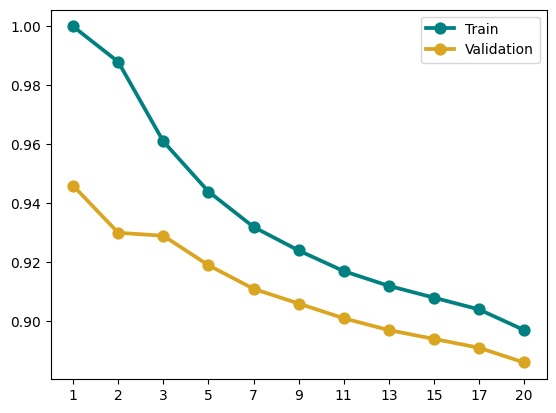

In [42]:
%%time
values_try = [1,2,3,5,7,9,11,13,15,17,20]
results_train, results_val = get_models_knn(keep_data, values_try)
point_plot(results_train, results_val, values_try)

__CONCLUSION__: <br>
It seems that the best value of number of neighbors to keep (considering the f1 score performance in validation) is 5 neighbors.

__`Step 32`__ - Create an instance of the model chosen for the algorithm KNN named as `final_model_knn`.

In [32]:
final_model_knn = KNeighborsClassifier(n_neighbors = 7)

__OTHER IMPORTANT HYPERPARAMETERS:__

|Parameter| Definition | Options | Default |
|---|---|---|---|
| weights| Weight function used in prediction. | Uniform, Distance | Uniform |
| algorithm | Algorithm used to compute the nearest neighbors. | ball_tree, kd_tree, brute, auto | auto |
| metric | Metric to use for distance computation. | Callable | Euclidean Distance |

<div class="alert alert-block alert-info">
    
<a class="anchor" id="22nd-bullet">

### 4.2.2. Decision Trees
    
</a>
    
<b>class sklearn.tree.DecisionTreeClassifier</b>(*, criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0)
</div>

In Decision Trees, the hyperparameter `max_depth` defines the number of levels our decision tree is going to have. Usually, a higher value leads to overfitting and a lower value to underfitting.

__`Step 33`__ Simillarly to what was done in Step 12, for the function `get_models_knn`, this time create a function to Decision Trees called `get_models_dt`. Instead of applying a KNeighborsClassifier with `n_neighbors = value`, we are going to train different depths of the decision tree with `max_depth = value`.

In [ ]:
def get_models_dt(data, values):
    models = dict()
    results_train, results_val = [],[]

    # create the instances of each model with different values
    for value in values:
        models['depth_' + str(value)] = DecisionTreeClassifier(max_depth = value, random_state = 99)

    for name, model in models.items():
        avg_train, std_train, avg_val, std_val = select_best_models(data, model)
        results_train.append(avg_train)
        results_val.append(avg_val)
    
    print(results_train)
    print(results_val)

    return results_train, results_val

__`Step 34`__ In this step:
- Define a list of number of maximum depths to train, namely [1,2,3,4,5,6,7,8,9].
- Call the function previously defined `get_models_dt` passing as arguments your data set and the list of depths.
- Call the function `point_plot`passing as arguments the results of the training data set, the results of the validation data set and the values of depths that you try.

[np.float64(0.847), np.float64(0.861), np.float64(0.87), np.float64(0.879), np.float64(0.885), np.float64(0.896), np.float64(0.907), np.float64(0.918), np.float64(0.929)]
[np.float64(0.846), np.float64(0.859), np.float64(0.866), np.float64(0.873), np.float64(0.876), np.float64(0.883), np.float64(0.889), np.float64(0.896), np.float64(0.899)]
CPU times: total: 15.4 s
Wall time: 23.4 s


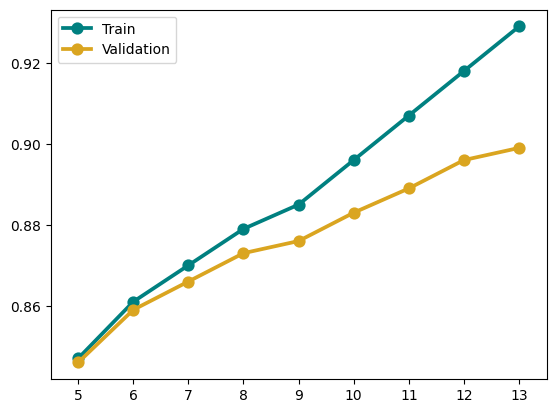

In [45]:
%%time
values_try = [5,6,7,8,9,10,11,12,13]
results_train, results_val = get_models_dt(keep_data, values_try)
point_plot(results_train, results_val, values_try)

__CONCLUSION__: <br>
It seems that the best value of levels to keep is 2 levels.

__`Step 35`__ Create an instance of the model chosen for the algorithm DecisionTree named as `final_model_dt`.

In [34]:
final_model_dt = DecisionTreeClassifier(max_depth = 8, random_state = 99)

<a class="anchor" id="23rd-bullet">

#### 4.2.2.1. ADDITIONAL: HOW TO VISUALIZE TREES
    
</a>

To visualize a decision tree, you need to create just one single model. For that, we are going to use train_train_split to apply an holdout method.

In [47]:
#data = keep_data.copy()

#X = data.drop(['y'], axis = 1)
#y = data['y'].copy()

#X= encode_data(X)

#X_train, X_val, y_train, y_val = train_test_split(X, y, train_size = 0.2, random_state = 99, stratify = y)


In [48]:
#def plot_tree(model):
#    dot_data = export_graphviz(model,
#                               feature_names=X_train.columns,
#                               filled=True)
#    pydot_graph = pydotplus.graph_from_dot_data(dot_data)
#    pydot_graph.set_size('"20,20"')
#    return graphviz.Source(pydot_graph.to_string())

In [49]:
#dt_visual = final_model_dt.fit(X_train, y_train)

In [50]:
#plot_tree(dt_visual)

It seems that a DecisionTree with max_depth = 2 (which is the best model we achieve by training different numbers of levels) use only the variable `Mnt` to do the splits. <br>
Probably this configuration is not the best to define as the best model from all the algorithms.

__OTHER IMPORTANT HYPERPARAMETERS:__

|Parameter| Definition | Options | Default | Approach |
|---|---|---|---|---|
| criterion| The function to measure the quality of a split. | gini, entropy, log_loss | gini | - |
| min_samples_split | The minimum number of samples required to split an internal node. | _int_ or _float_ | 2 | Prepruning technique |
| min_samples_leaf | The minimum number of samples required to be at a leaf node.  | _int_ or _float_ | 1 |Prepruning technique |
| max_leaf_nodes | The maximum number of leafs the tree can have.   | _int_ | None |Prepruning technique |
| min_impurity_decrease | A node will be split if it induces a decrease of the impurity greater than or equal to this value. | _float_ | 0.0 | Prepruning technique |
| ccp_alpha | Complexity parameter used for Minimal Cost-Complexity Pruning. | _float_ | 0.0 | Postpruning technique |
| splitter | The strategy used to choose the split at each node. If random,  the algorithm selects a random subset of features and finds the best split among them. | _best_ or _random_ | _best_| Overfitting |
| max_features | The number of features to consider when looking for the best split. | _int_, _float_, _sqrt_, ... | None | Overfitting |

<div class="alert alert-block alert-info">
    
<a class="anchor" id="24th-bullet">

### 4.2.3. Neural Networks
    
</a>

    
<b>class sklearn.neural_network.MLPClassifier</b>(hidden_layer_sizes=(100,), activation='relu', *, solver='adam', alpha=0.0001, batch_size='auto', learning_rate='constant', learning_rate_init=0.001, power_t=0.5, max_iter=200, shuffle=True, random_state=None, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True, early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08, n_iter_no_change=10, max_fun=15000)
</div>

In Neural Networks, the hyperparameter `hidden_layer_sizes` define the number hidden layers and hidden neurons in our network. Usually, increasing the number of neurons and layers leads to overfitting while a small value of neurons leads to underfitting.

__`Step 36`__ Similarly to what you have done for KNeighborsClassifier and DecisionTreeClassifier, this time we are going to create a function called `get_models_nn` where we are going to change the number of neurons and layers inside a Neural Network, by changing the hyperparameter `hidden_layer_sizes`. Define also `max_iter = 2000` and `random_state = 99`.

In [11]:
def get_models_nn(data, values):
    models = dict()
    results_train, results_val, names = [],[],[]

    # create the instances of each model with different values
    for value in values:
        models[str(value)] = MLPClassifier(hidden_layer_sizes = value, max_iter = 2000, random_state = 99)

    for name, model in models.items():
        avg_train, std_train, avg_val, std_val = select_best_models(data, model)
        results_train.append(avg_train)
        results_val.append(avg_val)
        names.append(name)

    return results_train, results_val, names

__`Step 37`__ In this step:
- Define a list of number of number of layers and neurons to train, namely [(10),(100),(150),(200),(300),(350),(400)].
- Call the function previously defined `get_models_nn` passing as arguments your data set and the list of hidden layers setups.
- Call the function `point_plot`passing as arguments the results of the training data set, the results of the validation data set and the values of the hidden layers setups that you try.

CPU times: total: 17min 15s
Wall time: 1h 31min 31s


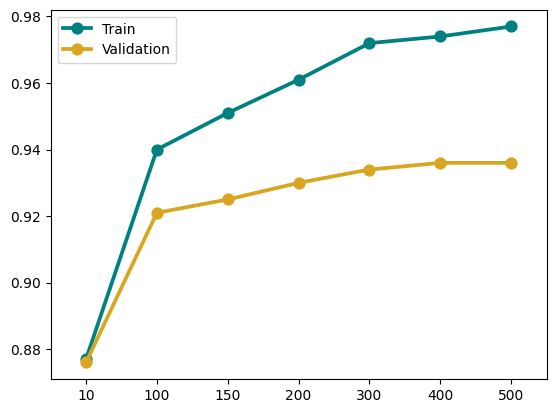

In [52]:
%%time
values_try = [(10),(100),(150),(200),(300),(400),(500)]
results_train, results_val, names = get_models_nn(keep_data, values_try)
point_plot(results_train, results_val, names)

__CONCLUSION__:

- A small number of neurons in our Neural Network (one hidden layer with 10 neurons) usually leads to underfitting situations. <br>
- Increasing the number of layers or neurons, usually leads to overfitting situations. This is clear on the examples with two layers, namely (100,100) and (150,150).


Until this point, our optimization was done manually. But certain algorithms, such as Neural Networks, have a significant quantity of hyperparameters that could influence each other. In those cases, it can be useful to try different combinations of hyperparameters.

__OTHER IMPORTANT HYPERPARAMETERS:__

|Parameter| Definition | Options | Default |
|---|---|---|---|
| solver| The solver for weight optimization. Lbfgs for small datasets. Adam for bigger datasets, can find a good result fast. In theory, sgd will a better solution but can take several iterations to achieve it. | _lbfgs_, _sgd_, _adam_ | _adam_ |
| learning_rate_init | The initial learning rate used. It controls the step-size in updating the weights. | _float_ | 0.001 |
| learning_rate | How to decrease the learning rate over iterations. Constant keeps always the same value, invscaling changes the learning rate defined by a function at x steps, adaptive reduces the learning rate when the error is not decreasing. | _constant_, _invscaling_, _adaptive_ | _constant_|
| activation | Activation function for the hidden layer. Logistic and tanh usually works better in classification problems. Relu is computationally more efficient.| _identity_, _logistic_, _tanh_, _relu_ | _relu_ |
| alpha | Strength of the L2 regularization term. Can be adjusted in overfitting situations.  | _float_ | 0.0001 |


<a class="anchor" id="29th-bullet">

#### 4.2.7.1. Neural Networks - Random Seacrh
    
</a>

In [10]:
nn = MLPClassifier(max_iter = 10000, random_state = 99)

In [ ]:
parameter_space_random_nn = {
    'hidden_layer_sizes': [(80),(90),(90,50),(100),(100,50),(120)],
    'learning_rate_init': [0.001, 0.01, 0.05, 0.1],
    'learning_rate': ['constant', 'invscaling','adaptive'],
    'solver': ['sgd','adam'],
    'activation': ['logistic','relu', 'tanh', 'identity'],
    'alpha': [0.001, 0.01, 0.1, 1]
}

In [ ]:
random_search_nn = RandomizedSearchCV(nn, param_distributions=parameter_space_random_nn,
                                      scoring = 'f1', cv=5, random_state=42, verbose=3)

In [15]:
%%time
random_search_nn.fit(X_data, y_data)

# Print the best hyperparameters and corresponding score
print("Best Hyperparameters: ", random_search_nn.best_params_)
print("Best Score: ", random_search_nn.best_score_)

Best Hyperparameters:  {'solver': 'adam', 'learning_rate_init': 0.001, 'learning_rate': 'adaptive', 'hidden_layer_sizes': (90, 50), 'alpha': 1, 'activation': 'logistic'}
Best Score:  0.7838901646091494
CPU times: total: 37min 8s
Wall time: 1h 26min 17s


<a class="anchor" id="34th-bullet">

#### 4.2.8.1. Neural Networks - Grid Search
    
</a>

In [11]:
parameter_space_grid_nn = {
    'solver': ['adam'],
    'learning_rate_init': [0.001, 0.01],
    'learning_rate': ['adaptive'],
    'hidden_layer_sizes': [(80,), (100,)],
    'alpha': [1],
    'activation': ['logistic', 'relu']
}

In [12]:
grid_search_nn = GridSearchCV(nn, parameter_space_grid_nn, scoring = 'f1', return_train_score = True, cv = 5, verbose=3)

In [13]:
%%time
grid_search_nn.fit(X_data, y_data)

# Print the best hyperparameters and corresponding score
print("Best Hyperparameters: ", grid_search_nn.best_params_)
print("Best Score: ", grid_search_nn.best_score_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV 1/5] END activation=logistic, alpha=1, hidden_layer_sizes=(80,), learning_rate=adaptive, learning_rate_init=0.001, solver=adam;, score=(train=0.832, test=0.851) total time=  32.2s
[CV 2/5] END activation=logistic, alpha=1, hidden_layer_sizes=(80,), learning_rate=adaptive, learning_rate_init=0.001, solver=adam;, score=(train=0.841, test=0.835) total time=  30.0s
[CV 3/5] END activation=logistic, alpha=1, hidden_layer_sizes=(80,), learning_rate=adaptive, learning_rate_init=0.001, solver=adam;, score=(train=0.846, test=0.742) total time=  28.3s
[CV 4/5] END activation=logistic, alpha=1, hidden_layer_sizes=(80,), learning_rate=adaptive, learning_rate_init=0.001, solver=adam;, score=(train=0.872, test=0.725) total time=  38.7s
[CV 5/5] END activation=logistic, alpha=1, hidden_layer_sizes=(80,), learning_rate=adaptive, learning_rate_init=0.001, solver=adam;, score=(train=0.867, test=0.768) total time=  36.8s
[CV 1/5] END activat

In [36]:
final_model_nn = MLPClassifier(activation = 'logistic',
                               hidden_layer_sizes = (80,),
                               learning_rate = 'adaptive',
                               learning_rate_init = 0.01,
                               solver = 'adam',
                               alpha = 1,
                               max_iter = 10000, random_state = 99)

<div class="alert alert-block alert-info">
    
<a class="anchor" id="25th-bullet">

### 4.2.4. Random Forest
    
</a>

    
<b>class sklearn.ensemble.RandomForestClassifier</b>(n_estimators=100, *, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='sqrt', max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None, monotonic_cst=None)[source]
</div>

In Random Forest, the hyperparameter `n_estimators` define the number estimators which sets the number of trees in the forest.

__`Step 38`__ Similarly to what you have done for the previous models, this time we are going to create a function called `get_models_rf_n_estimators` where we are going to change the number of estimators, by changing the hyperparameter `n_estimators`. Define also `max_depth = 3` and `random_state = 99`.

In [13]:
def get_models_rf_n_estimators(data, values):
    models = dict()
    results_train, results_val, names = [],[],[]

    # create the instances of each model with different values
    for value in values:
        models[str(value)] = RandomForestClassifier(n_estimators=value, max_depth=3, random_state=99)

    for name, model in models.items():
        avg_train, std_train, avg_val, std_val = select_best_models(data, model)
        results_train.append(avg_train)
        results_val.append(avg_val)
        names.append(name)

    print(results_train)
    print(results_val)

    return results_train, results_val, names

[np.float64(0.847), np.float64(0.861), np.float64(0.858), np.float64(0.853), np.float64(0.85), np.float64(0.851), np.float64(0.854), np.float64(0.853)]
[np.float64(0.846), np.float64(0.861), np.float64(0.858), np.float64(0.852), np.float64(0.849), np.float64(0.85), np.float64(0.853), np.float64(0.853)]
CPU times: total: 3min 21s
Wall time: 3min 38s


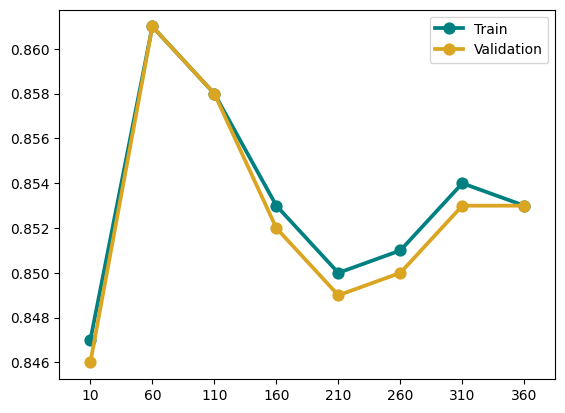

In [54]:
%%time
values_try = list(range(10,400,50))

results_train, results_val, names = get_models_rf_n_estimators(keep_data, values_try)
point_plot(results_train, results_val, names)

<a class="anchor" id="30th-bullet">

#### 4.2.7.2. Random Forest - Random Search
    
</a>

In [14]:
rf = RandomForestClassifier(n_estimators=60, max_depth=3, random_state=99)

In [15]:
parameter_space_random_rf = {
    'n_estimators':[40,50,60,70,80],
    'min_samples_split': list(range(2, 20)),
    'min_samples_leaf': list(range(1, 20)),
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False]
}

In [17]:
random_search_rf = RandomizedSearchCV(rf, param_distributions=parameter_space_random_rf,
                                   scoring = 'f1', cv=5, random_state=42, verbose=3)

In [18]:
%%time
random_search_rf.fit(X_data, y_data)

# Print the best hyperparameters and corresponding score
print("Best Hyperparameters: ", random_search_rf.best_params_)
print("Best Score: ", random_search_rf.best_score_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END bootstrap=False, max_features=sqrt, min_samples_leaf=5, min_samples_split=16, n_estimators=40;, score=0.850 total time=   0.9s
[CV 2/5] END bootstrap=False, max_features=sqrt, min_samples_leaf=5, min_samples_split=16, n_estimators=40;, score=0.851 total time=   0.8s
[CV 3/5] END bootstrap=False, max_features=sqrt, min_samples_leaf=5, min_samples_split=16, n_estimators=40;, score=0.844 total time=   0.8s
[CV 4/5] END bootstrap=False, max_features=sqrt, min_samples_leaf=5, min_samples_split=16, n_estimators=40;, score=0.849 total time=   0.7s
[CV 5/5] END bootstrap=False, max_features=sqrt, min_samples_leaf=5, min_samples_split=16, n_estimators=40;, score=0.849 total time=   0.7s
[CV 1/5] END bootstrap=True, max_features=auto, min_samples_leaf=10, min_samples_split=12, n_estimators=40;, score=nan total time=   0.0s
[CV 2/5] END bootstrap=True, max_features=auto, min_samples_leaf=10, min_samples_split=12, n_estimato

<a class="anchor" id="35th-bullet">

#### 4.2.8.2. Random Forest - Grid Search
    
</a>

In [19]:
parameter_space_grid_rf = {'n_estimators': [20,30 ,40,50,60,70,80],
                            'min_samples_split': [12,14,16,18,20],
                            'min_samples_leaf': [5],
                            'max_features': ['log2','sqrt'],
                            'bootstrap': [False]}

In [20]:
grid_search_rf = GridSearchCV(rf, parameter_space_grid_rf, scoring = 'f1', return_train_score = True, cv = 5, verbose=3)

In [21]:
%%time
grid_search_rf.fit(X_data, y_data)

# Print the best hyperparameters and corresponding score
print("Best Hyperparameters: ", grid_search_rf.best_params_)
print("Best Score: ", grid_search_rf.best_score_)

Fitting 5 folds for each of 70 candidates, totalling 350 fits
[CV 1/5] END bootstrap=False, max_features=log2, min_samples_leaf=5, min_samples_split=12, n_estimators=20;, score=(train=0.839, test=0.837) total time=   0.3s
[CV 2/5] END bootstrap=False, max_features=log2, min_samples_leaf=5, min_samples_split=12, n_estimators=20;, score=(train=0.836, test=0.839) total time=   0.4s
[CV 3/5] END bootstrap=False, max_features=log2, min_samples_leaf=5, min_samples_split=12, n_estimators=20;, score=(train=0.829, test=0.823) total time=   0.3s
[CV 4/5] END bootstrap=False, max_features=log2, min_samples_leaf=5, min_samples_split=12, n_estimators=20;, score=(train=0.832, test=0.828) total time=   0.3s
[CV 5/5] END bootstrap=False, max_features=log2, min_samples_leaf=5, min_samples_split=12, n_estimators=20;, score=(train=0.829, test=0.834) total time=   0.3s
[CV 1/5] END bootstrap=False, max_features=log2, min_samples_leaf=5, min_samples_split=12, n_estimators=30;, score=(train=0.854, test=0.85

In [23]:
final_model_rf = RandomForestClassifier(n_estimators=30,
                                        min_samples_leaf = 5, 
                                        min_samples_split = 12,
                                        max_features= 'log2', 
                                        bootstrap= False, 
                                        random_state = 99)

<div class="alert alert-block alert-info">
    
<a class="anchor" id="26th-bullet">

### 4.2.5. Gardient Boosting
    
</a>
    
<b>class sklearn.ensemble.GradientBoostingClassifier(*, loss='log_loss', learning_rate=0.1, n_estimators=100, subsample=1.0, criterion='friedman_mse', min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_depth=3, min_impurity_decrease=0.0, init=None, random_state=None, max_features=None, verbose=0, max_leaf_nodes=None, warm_start=False, validation_fraction=0.1, n_iter_no_change=None, tol=0.0001, ccp_alpha=0.0)
</div>

In [27]:
def get_models_gb_max_depth(data, values):
    models = dict()
    results_train, results_val, names = [],[],[]

    # create the instances of each model with different values
    for value in values:
        models[str(value)] = GradientBoostingClassifier(max_depth = value)

    for name, model in models.items():
        avg_train, std_train, avg_val, std_val = select_best_models(data, model)
        results_train.append(avg_train)
        results_val.append(avg_val)
        names.append(name)

    return results_train, results_val, names

CPU times: total: 40min 39s
Wall time: 44min 42s


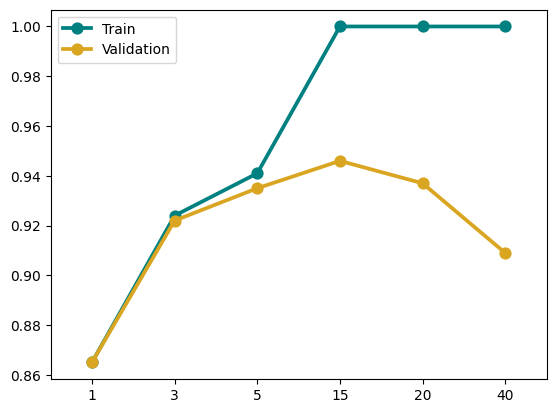

In [ ]:
%%time
values_try = [1, 3, 5,15,20,40]
results_train, results_val, names = get_models_gb_max_depth(keep_data, values_try)
point_plot(results_train, results_val, names)

<a class="anchor" id="31st-bullet">

#### 4.2.7.3. Gradient Boosting - Random Search
    
</a>

In [19]:
gb = GradientBoostingClassifier(max_depth = 5, random_state = 99)

In [29]:
parameter_space_random_gb = {
    'learning_rate': [0.01, 0.05, 0.1, 0.15, 0.20, 0.25, 0.3],
    'n_estimators' : [11,100,150,200,250,300,350,500,750,1000],
    'min_samples_split' : [2,10,20,100,200,300],
    'min_samples_leaf' : [1,5,10,50,100,200,300],
    'max_features' : list(range(1,20)),
    'max_depth': [3,4,5,6,7]
}

In [30]:
random_search_gb = RandomizedSearchCV(gb, param_distributions=parameter_space_random_gb,
                                   scoring = 'f1', cv=5, random_state = 99)

In [31]:
%%time
random_search_gb.fit(X_data, y_data)

# Print the best hyperparameters and corresponding score
print("Best Hyperparameters: ", random_search_gb.best_params_)
print("Best Score: ", random_search_gb.best_score_)

Best Hyperparameters:  {'n_estimators': 500, 'min_samples_split': 2, 'min_samples_leaf': 5, 'max_features': 19, 'max_depth': 5, 'learning_rate': 0.01}
Best Score:  0.8265054819921811
CPU times: total: 28min 2s
Wall time: 35min 45s


<a class="anchor" id="36th-bullet">

#### 4.2.8.3. Gradient Booster - Grid Search
    
</a>

In [32]:
parameter_space_grid_gb = {
  'n_estimators': [500],
  'min_samples_split': [2],
  'min_samples_leaf': [50],
  'max_features': [19],
  'max_depth': [5], 
  'learning_rate': [0.005,0.01,0.1, 0.15, 0.2]}

In [33]:
grid_search_gb = GridSearchCV(gb, parameter_space_grid_gb, scoring = 'f1', return_train_score = True, cv = 5, verbose=3)

In [34]:
%%time
grid_search_gb.fit(X_data, y_data)

# Print the best hyperparameters and corresponding score
print("Best Hyperparameters: ", grid_search_gb.best_params_)
print("Best Score: ", grid_search_gb.best_score_)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV 1/5] END learning_rate=0.005, max_depth=5, max_features=19, min_samples_leaf=50, min_samples_split=2, n_estimators=500;, score=(train=0.914, test=0.830) total time= 1.5min
[CV 2/5] END learning_rate=0.005, max_depth=5, max_features=19, min_samples_leaf=50, min_samples_split=2, n_estimators=500;, score=(train=0.896, test=0.862) total time= 1.3min
[CV 3/5] END learning_rate=0.005, max_depth=5, max_features=19, min_samples_leaf=50, min_samples_split=2, n_estimators=500;, score=(train=0.892, test=0.852) total time= 1.3min
[CV 4/5] END learning_rate=0.005, max_depth=5, max_features=19, min_samples_leaf=50, min_samples_split=2, n_estimators=500;, score=(train=0.909, test=0.767) total time= 1.3min
[CV 5/5] END learning_rate=0.005, max_depth=5, max_features=19, min_samples_leaf=50, min_samples_split=2, n_estimators=500;, score=(train=0.911, test=0.804) total time= 1.3min
[CV 1/5] END learning_rate=0.01, max_depth=5, max_features=1

In [24]:
final_model_gb = GradientBoostingClassifier(learning_rate = 0.01,
                                            max_depth = 5,
                                            max_features = 19, 
                                            min_samples_leaf = 50,
                                            min_samples_split = 2,
                                            n_estimators = 500,
                                            random_state = 99)

<div class="alert alert-block alert-info">
    
<a class="anchor" id="27th-bullet">

### 4.2.6. Support Vector Classification
    
</a>
    
<b>class sklearn.svm.SVC(*, C=1.0, kernel='rbf', degree=3, gamma='scale', coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape='ovr', break_ties=False, random_state=None)</div>


In [35]:
def get_models_svc_c(data, values):
    models = dict()
    results_train, results_val, names = [],[],[]

    # create the instances of each model with different values
    for value in values:
        models[str(value)] = SVC(C = value)

    for name, model in models.items():
        avg_train, std_train, avg_val, std_val = select_best_models(data, model)
        results_train.append(avg_train)
        results_val.append(avg_val)
        names.append(name)

    return results_train, results_val, names

CPU times: total: 1h 25min 34s
Wall time: 1h 38min 23s


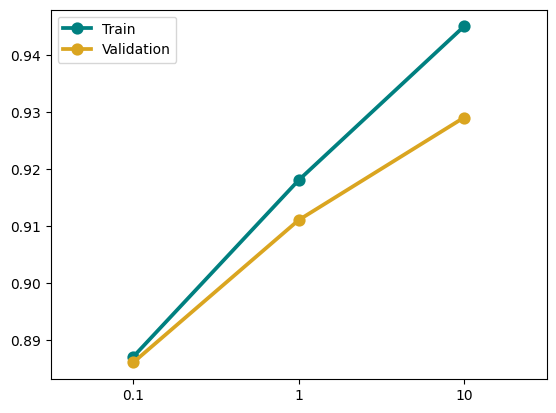

In [ ]:
%%time
values_try = [0.1, 1, 10]
results_train, results_val, names = get_models_svc_c(keep_data, values_try)
point_plot(results_train, results_val, names)

<a class="anchor" id="32nd-bullet">

#### 4.2.7.4. Support Vector Classification - Random Search
    
</a>

In [36]:
svc = SVC(C = 1)

In [ ]:
parameter_space_random_svc = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma':  [0.1, 1, 'scale', 'auto'],
}

In [38]:
random_search_svc = RandomizedSearchCV(svc, param_distributions=parameter_space_random_svc,
                                   scoring = 'f1', cv=5, random_state = 99)

In [ ]:
%%time
random_search_svc.fit(X_data, y_data)

# Print the best hyperparameters and corresponding score
print("Best Hyperparameters: ", random_search_svc.best_params_)
print("Best Score: ", random_search_svc.best_score_)

<a class="anchor" id="37th-bullet">

#### 4.2.8.4. Support Vector Classification - Grid Search
    
</a>

In [ ]:
parameter_space_grid_svc = {
    'C': [0.1, 1, 10],
    'kernel': ['poly'],
    'gamma':  [0.1, 1, 'scale', 'auto'],
    'probability' : [True]
}

In [ ]:
grid_search_svc = GridSearchCV(svc, parameter_space_grid_svc, scoring = 'f1', return_train_score = True, cv = 5)

In [ ]:
%%time
grid_search_svc.fit(X_data, y_data)

# Print the best hyperparameters and corresponding score
print("Best Hyperparameters: ", grid_search_svc.best_params_)
print("Best Score: ", grid_search_svc.best_score_)

Best Hyperparameters:  {'C': 10, 'gamma': 'scale', 'kernel': 'poly', 'probability': True}
Best Score:  0.9344597698674338
CPU times: total: 1h 6min 7s
Wall time: 1h 7min 59s


In [25]:
final_model_svc = SVC(C= 10,
                    kernel = 'poly',
                    gamma = 'scale',
                    random_state = 99,
                    probability = True)

<a class="anchor" id="28th-bullet">

### 4.2.7. RandomSearch
    
</a>

RandomizedSearchCV is a function provided by Scikit-learn (sklearn) that is used for hyperparameter tuning. While GridSearchCV exhaustively explores all possible combinations of hyperparameters, RandomizedSearchCV randomly samples a specified number of combinations from the parameter grid.

The random sampling of parameter combinations makes RandomizedSearchCV more efficient than GridSearchCV for large hyperparameter spaces. It allows you to define the number of iterations to control the search space exploration. RandomizedSearchCV selects the hyperparameter values randomly for each iteration and evaluates them using cross-validation.

Similar to GridSearchCV, RandomizedSearchCV returns the best set of hyperparameters based on a specified performance metric. The best hyperparameters can then be used to train a final model on the full dataset for making predictions.

RandomizedSearchCV is particularly useful when the hyperparameter search space is large and you want to explore a subset of it efficiently. It is a good choice when you have a limited computational budget or when you want to get a sense of the hyperparameter space before performing a more focused search using GridSearchCV.

__NOTE:__ RandomizedSearch do the process of cross validation inside the method itself. In this way, we are going to use the full data set and do all the needed changes and transformations on the data before applying the RandomizedSearch.

In theory, the best approach would be doing the needed changes inside the GridSearch, since we know that we want to use only information to fill missing data, scale the data, and so on. However, we are not be able to do this inside GridSearch without the usage of pipelines, which are not approached in this course.

__`Step 39`__ Create a copy of all_data named as `data` and define the independent variables as `X_data` and the target as `y_data`. Transform the data as needed by calling the function `encode_data`.

In [29]:
#data = keep_data.copy()

X_data = X_train_resampled.copy()
y_data = y_train_resampled.copy()

keep_data = pd.concat([X_data, y_data], axis=1)

#X_data = encode_data(X_data)
#scaler = MinMaxScaler()
#X_data = scaler.fit_transform(X_data)

__`Step 40`__ Create an instance of each algorithm to test.

__`Step 41`__ Define a dictionary named as __parameter_space_random__ and define the the options to be considered during modelling of each algorithm.

__`Step 42`__ Create an instance of RandomizedSearchCV named as __random_search__ and pass as parameters each the desired model, the __parameter_space_random__ defined for that model, define `scoring = f1`, `cv = 5` and `random_state = 99`.

__`Step 43`__ Fit your instance to __X_data__ and __y_data__. <br>
Call the attribute __best_params___ to check which is the best combination of parameters<br>
Call the attribute __best_score___ to obtain the mean cross-validated score of the best_estimator.

__`Step 44`__ Use these parameters as guidelines to apply Grid Search CV in the following step.

<a class="anchor" id="33rd-bullet">

### 4.2.8. GridSearch
    
</a>



Another approach is using GridSearch that performs an exhaustive search over specified parameter values for an estimator. <br>
It is used for hyperparameter tuning, which involves finding the best combination of hyperparameters for a machine learning model.

To use GridSearchCV, you provide a parameter grid, which is a dictionary or a list of dictionaries containing the hyperparameters and their corresponding values to explore. The function then evaluates all possible combinations of hyperparameters using cross-validation. It trains and evaluates the model with each combination and returns the best set of hyperparameters that optimize a specified performance metric, such as accuracy or F1 score.

GridSearchCV systematically explores the entire parameter grid, making it computationally expensive for large grids or complex models. However, it ensures that you find the optimal hyperparameters by considering all possible combinations. Once you have the best hyperparameters, you can use them to train a final model on the full dataset for making predictions.

__`Step 45`__ Define a dictionary named as __parameter_space_grid__ for each one of the models and define the options to be considered during modelling.

__`Step 46`__ Create an instance of GridSearchCV named as __grid_search__ and pass as parameters the respective model, the __parameter_space_grid__, define `scoring = f1` and `cv = 5`.

__`Step 47`__ Fit your instance to __X_data__ and __y_data__. <br>
Call the attribute __best_params___ to check which is the best combination of parameters<br>
Call the attribute __best_score___ to obtain the mean cross-validated score of the best_estimator.

__`Step 48`__ Create an instance of the model chosen for the each algorithm named as `final_model_`.

**NOTE: We applied this process to all of our models in attempt to reach an optimized set of hyperparameters**

<a class="anchor" id="38th-bullet">

### 4.2.9. Select the winner model
    
</a>

<a class="anchor" id="39th-bullet">

#### 4.2.9.1. COMPARE THE PERFORMANCE
    
</a>

Let's compare our final models:

__`Step 49`__ Compare the models using the function defined previoulsy `show_results`.

In [30]:
def select_best_models(data, model):
    skf = StratifiedKFold(n_splits = 5, random_state = 99, shuffle = True)
    X = data.drop('y', axis = 1)
    y = data['y'].copy()

    #X = encode_data(X)

    score_train, score_val = [],[]

    # perform the cross-validation
    for train_index, val_index in skf.split(X,y):
        X_train, X_val = X.iloc[train_index], X.iloc[val_index]
        y_train, y_val = y.iloc[train_index], y.iloc[val_index]

        # Scale the data
        #scaler = MinMaxScaler().fit(X_train)
        #X_train = scaler.transform(X_train)
        #X_val = scaler.transform(X_val)

        # Apply model
        model.fit(X_train, y_train)
        predictions_train = model.predict(X_train)
        predictions_val = model.predict(X_val)
        score_train.append(f1_score(y_train, predictions_train))
        score_val.append(f1_score(y_val, predictions_val))

    avg_train = round(np.mean(score_train),3)
    avg_val = round(np.mean(score_val),3)
    std_train = round(np.std(score_train),2)
    std_val = round(np.std(score_val),2)

    return avg_train, std_train, avg_val, std_val

def show_results(df, data, *args):
    count = 0
    # for each instance of model passed as argument
    for arg in args:
        avg_train, std_train, avg_val, std_val = select_best_models(data, arg)
        # store the results in the right row
        df.iloc[count] = str(avg_train) + '+/-' + str(std_train), str(avg_val) + '+/-' + str(std_val)
        count+=1
    return df

In [37]:
%%time
df_final_models = pd.DataFrame(columns = ['Train','Validation'], index = ['Best KNN','Best DT', 'Best NN', 'Best RF', 'Best GB'])#, 'Best SVC'])
show_results(df_final_models, keep_data, final_model_knn, final_model_dt, final_model_nn, final_model_rf, final_model_gb)# final_model_svc)

CPU times: total: 7min 47s
Wall time: 9min 4s


,Train,Validation
Best KNN,0.925+/-0.0,0.902+/-0.0
Best DT,0.88+/-0.0,0.872+/-0.01
Best NN,0.847+/-0.0,0.847+/-0.0
Best RF,0.969+/-0.0,0.935+/-0.0
Best GB,0.924+/-0.0,0.92+/-0.0


<a class="anchor" id="40th-bullet">

#### __4.2.9.2. PLOT A ROC CURVE__
    
</a>

__`Step 50`__ Now we are going to compare our models using a ROC CURVE. To plot a ROC Curve, we need to create just one single model, and not several as we have when we apply StratifiedKFold.

Create a copy of `all_data` as `data` and define your independent variables as `X_data` and your target as `y_data`.

In [ ]:
#data = keep_data.copy()

#data = pd.read_parquet(r'Datasets\\parquet\\bank_all_feature_selection.parquet')

#X_data = data.iloc[:, :-1]
#y_data = data.iloc[:, -1]

__`Step 51`__ Apply the needed transformations by calling the `encode_data` function.

In [ ]:
#X_data = encode_data(X_data)

__`Step 52`__ Split your dataset into train and validation using train_train_split, where `train_size = 0.8`, `random_state = 99` and `stratify = y_data`, and fit your three models in the training data.

In [38]:
X_train, X_val, y_train, y_val = train_test_split(X_data, y_data,
                                                  train_size = 0.8,
                                                  random_state = 99,
                                                  stratify = y_data)

#scaler = MinMaxScaler().fit(X_train)
#X_train = scaler.transform(X_train)
#X_val = scaler.transform(X_val)


model_knn = final_model_knn.fit(X_train, y_train)
model_dt = final_model_dt.fit(X_train, y_train)
model_nn = final_model_nn.fit(X_train, y_train)
model_rf = final_model_rf.fit(X_train, y_train)
model_gb = final_model_gb.fit(X_train, y_train)
#model_svc = final_model_svc.fit(X_train, y_train)

__`Step 53`__ Use the `.predict_proba()` method of `modelknn` to obtain the probability estimates for the `X_val` and assign it to the object `prob_modelKNN`. Do the same for the other models, and assign it to `prob_modelDT` and `prob_modelNN`.

In [39]:
prob_modelKNN = model_knn.predict_proba(X_val)
prob_modelDT =  model_dt.predict_proba(X_val)
prob_modelNN =  model_nn.predict_proba(X_val)
prob_modelRF = model_rf.predict_proba(X_val)
prob_modelGB = model_gb.predict_proba(X_val)
#prob_modelSVC = model_svc.predict_proba(X_val)

__`Step 54`__ Call roc_curve() for the three different models. In this way, you should: <br>
1) For the first roc curve, call the roc_curve metric and define the arguments `y_true` equal to `y_val` and `y_score` equal to `prob_modelKNN[:, 1]`. Assign the results to `fpr_modelKNN`, `tpr_modelKNN` and `thresholds_modelKNN`. <br>
2) Repeat the same procedure to the remaining models, changing the names of the objects accordingly.

In [40]:
fpr_modelKNN, tpr_modelKNN, thresholds_modelKNN = roc_curve(y_true = y_val, y_score = prob_modelKNN[:,1])
fpr_modelDT, tpr_modelDT, thresholds_modelDT = roc_curve(y_val, prob_modelDT[:,1])
fpr_modelNN, tpr_modelNN, thresholds_modelNN = roc_curve(y_val, prob_modelNN[:,1])
fpr_modelRF, tpr_modelRF, thresholds_modelRF = roc_curve(y_val, prob_modelRF[:,1])
fpr_modelGB, tpr_modelGB, thresholds_modelGB = roc_curve(y_val, prob_modelGB[:,1])
#fpr_modelSVC, tpr_modelSVC, thresholds_modelSVC = roc_curve(y_val, prob_modelSVC[:,1])

__`Step 55`__ The purpose of this step is to plot the roc curve associated to each model. Do the following instructions in only one single cell, so the three roc curves appear in the same visualization. <br>
1) Create a plot using the function `plt.plot()`, where the data to be represented is going to be the `fpr_modelKNN`, `tpr_modelKNN`, and `label="ROC Curve KNN"` <br>
2) Similarly to the previous step, plot now the values regarding `modelDT` <br>
3) Similarly to the previous step, plot now the values regarding `modelNN` <br>
4) call the function plt.legend()
5) Call the function plt.show()

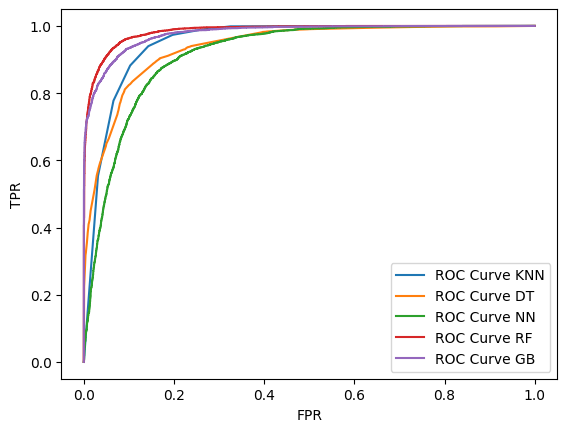

In [41]:
plt.plot(fpr_modelKNN, tpr_modelKNN,label="ROC Curve KNN")
plt.plot(fpr_modelDT, tpr_modelDT, label="ROC Curve DT")
plt.plot(fpr_modelNN, tpr_modelNN, label="ROC Curve NN")
plt.plot(fpr_modelRF, tpr_modelRF, label="ROC Curve RF")
plt.plot(fpr_modelGB, tpr_modelGB, label="ROC Curve GB")
#plt.plot(fpr_modelSVC, tpr_modelSVC, label="ROC Curve SVC")

plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()
plt.show()

In [42]:
# Alternatively, you can use roc_auc_score
roc_auc_modelKNN = roc_auc_score(y_val, prob_modelKNN[:, 1])
roc_auc_modelDT = roc_auc_score(y_val, prob_modelDT[:, 1])
roc_auc_modelNN = roc_auc_score(y_val, prob_modelNN[:, 1])
roc_auc_modelRF = roc_auc_score(y_val, prob_modelRF[:, 1])
roc_auc_modelGB = roc_auc_score(y_val, prob_modelGB[:, 1])
#roc_auc_modelSVC = roc_auc_score(y_val, prob_modelSVC[:, 1])

print('KNN:', roc_auc_modelKNN)
print('DT:',roc_auc_modelDT)
print('NN:',roc_auc_modelNN)
print('RF:',roc_auc_modelRF)
print('GB:',roc_auc_modelGB)
#print('SVC:',roc_auc_modelSVC)

KNN: 0.9515422127492659
DT: 0.9379041351235602
NN: 0.9160917970084009
RF: 0.9846454637254651
GB: 0.9780752196650032


__CONCLUSION__ <br>
- While considering the roc curve and the AUC, it seems that the Gradient Boosting is the one that achieves a better result. A higher AUC value generally indicates a better performing model. It means the model is better at distinguishing between the positive and negative classes across different threshold levels.

<a class="anchor" id="41st-bullet">

#### 4.2.9.3. CHANGE THE THRESHOLD
    
</a>

At this point, you already know which are the best hyperparameters of your best model. <br>
The last thing you can try out to improve the performance of your model is to change the threshold of what you consider a positive prediction vs a negative prediction. <br>
By default, that threshold is 0.5, i.e., observations where the probability of being 1 is equal or lower to 0.5 are considered positive, otherwise negative.

Like we did to plot the ROC Curve, in this case we are just going to use one partition, provided by the train_train_split on `Step 31.`


__`Step 56`__ Fit your final model to the training data (we are going to consider the GB since it was the one that seems to lead to better results by changing the threshold).

In [43]:
final_model = final_model_rf.fit(X_train, y_train)

__`Step 57`__ Calculate the probabilities associated with each observation in X_val being of class 0 or 1.

In [44]:
predict_proba = final_model.predict_proba(X_val)
predict_proba

array([[7.59642401e-02, 9.24035760e-01],
       [9.98751466e-01, 1.24853422e-03],
       [6.77048100e-01, 3.22951900e-01],
       ...,
       [4.41666667e-02, 9.55833333e-01],
       [3.00300300e-04, 9.99699700e-01],
       [5.55555556e-03, 9.94444444e-01]])

__`Step 58`__ The purpose of this step is to plot the precision recall curve associated to the best model. <br>
1) Import precision_recall_curve from sklearn.metrics<br>
2) Get the precision, the recall and the thresholds from your precision recall curve<br>
3) Check what is the threshold for the best f1 score<br>
4) Plot the precision recall curve and the best threshold.<br>

Best Threshold=0.503457, F-Score=0.937


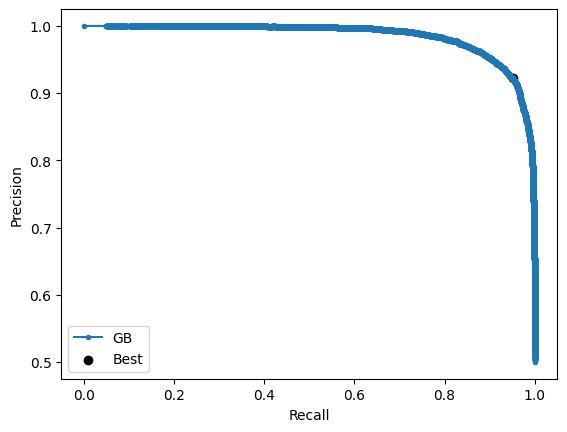

In [45]:
precision, recall, thresholds = precision_recall_curve(y_val, predict_proba[:,1])

# Compute F1 score, avoid division by zero
fscore = np.where((precision + recall) > 0, (2 * precision * recall) / (precision + recall), 0)
# locate the index of the largest f score
ix = np.argmax(fscore)
print('Best Threshold=%f, F-Score=%.3f' % (thresholds[ix], fscore[ix]))

plt.plot(recall, precision, marker='.', label='GB')
plt.scatter(recall[ix], precision[ix], marker='o', color='black', label='Best')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.show()

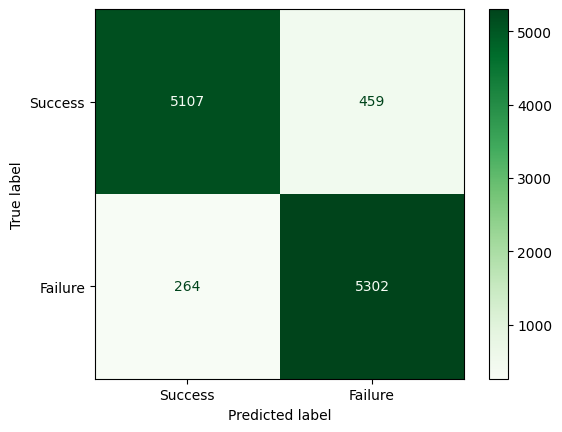

In [55]:
y_pred = final_model_rf.predict(X_val)


from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
import matplotlib.pyplot as plt

cm = confusion_matrix(y_val, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Success','Failure'])

disp.plot(cmap=plt.cm.Greens)


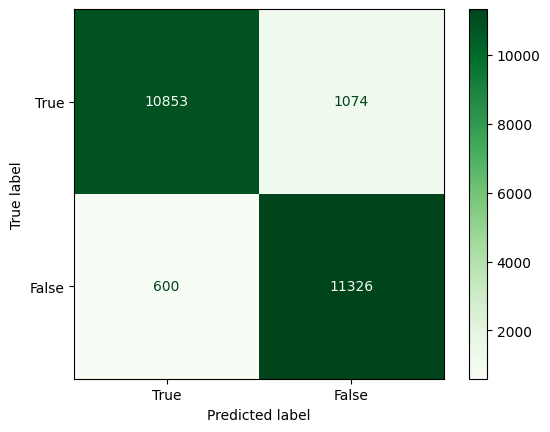

In [ ]:
y_pred = final_model_rf.predict(X_test)


from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['True','False'])

disp.plot(cmap=plt.cm.Greens)


__CONCLUSION__ <br>
- By changing the threshold to 0.587870, we are able to improve the f1-score of our final model.

<a class="anchor" id="42nd-bullet">

# 5. Deploy

</a>



You used the previous steps of modelling and assessment to determine what would be best strategies when it comes to preprocessing, scaling, feature selection, algorithm and hyper-parameters you could find.

**By this stage, all of those choices were already made**. For that reason, a split between training and validation is no longer necessary. **A good practice** would be to take the initial data and train a final model with all of the labeled data that you have available.

In [ ]:
#train = keep_data.copy()

#X2_train = train.drop(['y'], axis = 1)
#y2_train = train['y']

**Everything is figured by this stage**, so, on a first level all you need to do is replicate the exact preprocessing, scaling and feature selection decisions you made before.<br>
When it comes to the final model, all you have to do is creeate a new instance of your best algorithm with the best parameters that you uncovered (no need to try all algorithms and hyper-parameters again).

<div class="alert alert-block alert-success">

<a class="anchor" id="43rd-bullet">

## 5.1. Import your train data and apply transformations
    
</a>
    
</div>

__`Step 59`__ Remember, the train data does not have the `outcome` variable.

In [80]:
def process_bank_data(bank):
    columns_to_replace = ['y', 'loan', 'housing', 'default']
    for column in columns_to_replace:
        bank[column] = bank[column].replace({'yes': 1, 'no': 0})

    columns_to_encode = ['education', 'job', 'contact', 'month', 'poutcome', 'marital', 'Week_Day']
    for column in columns_to_encode:
        bank = pd.get_dummies(bank, columns=[column], drop_first=False)

    columns_to_drop = [col for col in bank.columns if '_unknown' in col]
    bank = bank.drop(columns=columns_to_drop)

    bank = bank[['Week_Day_Fri', 'Week_Day_Sat', 'Week_Day_Thu', 'campaign', 'contact_cellular',
    'day', 'duration', 'education_secondary', 'education_tertiary', 'housing',
    'job_blue-collar', 'loan', 'marital_single', 'month_apr', 'month_aug',
    'month_jul', 'month_mar', 'month_may', 'month_nov', 'month_oct',
    'poutcome_success', 'previous',
    
    'age','Week_Day_Wed',   
    
    'y']].copy()
    
    target = bank['y']
    
    bank = bank.drop(['y'], axis=1)

    return bank, target


In [ ]:
test = pd.read_parquet(r"Datasets\parquet\bank.parquet")
test, test_target = process_bank_data(test)

# test = test[['Week_Day_Fri', 'Week_Day_Sat', 'Week_Day_Thu', 'campaign', 'contact_cellular',
#     'day', 'duration', 'education_secondary', 'education_tertiary', 'housing',
#     'job_blue-collar', 'loan', 'marital_single', 'month_apr', 'month_aug',
#     'month_jul', 'month_mar', 'month_may', 'month_nov', 'month_oct',
#     'poutcome_success', 'previous',
    
#     'age','Week_Day_Wed',   
    
#     'y']].copy()

#target_test = test['y']
#test = test.drop(['y'], axis=1)
#test_target

0       0
1       0
2       0
3       0
4       0
       ..
4516    0
4517    0
4518    0
4519    0
4520    0
Name: y, Length: 4416, dtype: int64

__`Step 60`__ Apply all the needed transformations in your training data and your train data. All the steps on preprocessing that you did on train should also be applied now on train, exactly on the same way (with the exception of rows removal).

In [83]:
#train = encode_data(X2_train)
#test = encode_data(test)

scaler = MinMaxScaler().fit(X_train)
#train = pd.DataFrame(scaler.transform(train), columns = train.columns)
test = pd.DataFrame(scaler.transform(test), columns = test.columns, index = test.index)

In [84]:
final_model = final_model_gb.fit(test, test_target)

__`Step 61`__ Train your final model in the training data.

<div class="alert alert-block alert-success">

<a class="anchor" id="44th-bullet">

## 5.2. Obtain Predictions on the train data from your final model
    
</a>
    
</div>

__`Step 62`__ Obtain the predictions of the probabilities of your final model in the train data. by calling the method `predict_proba()`.

In [85]:
final_model.predict(test) # the method predict() will predict the classes of your target when the threshold = 0.5

array([0, 0, 0, ..., 0, 0, 0])

In [86]:
predict_proba_test = final_model.predict_proba(test)
predict_proba_test

array([[0.88728889, 0.11271111],
       [0.93521144, 0.06478856],
       [0.91535903, 0.08464097],
       ...,
       [0.98088775, 0.01911225],
       [0.94408323, 0.05591677],
       [0.82954641, 0.17045359]])

__`Step 63`__ Define your final predictions, by changing the threshold of what is accepted as 1 and as 0.

In [87]:
final_pred = []
from collections import Counter

for value in predict_proba_test[:,1]:
    if (value>=0.503457):
        final_pred.append(1)
    else:
        final_pred.append(0)

Counter(final_pred)

Counter({0: 4136, 1: 280})

In [89]:
X_train.to_parquet(r'Datasets\parquet\bank_trained.parquet')

<div class="alert alert-block alert-success">

<a class="anchor" id="45th-bullet">

## 5.3. Create a Dataframe containing the index of each row and its intended prediction and export it to a csv file
    
</a>
    
</div>

__`Step 64`__ Create a new DataFrame, and add as column `Custid` the values of the `Custid` for each customer in the train data set, and a column named `y` where you will store the preditions of your final model in the train data. Save those results in a .csv file.

In [113]:
answer = pd.DataFrame()
answer['ID'] = test.index
answer['y'] = final_pred
answer.head(20)

,ID,y
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0
5,5,0
6,6,0
7,7,0
8,8,0
9,9,0


In [114]:
answer = answer.reset_index(drop=True)
target_test = target_test.reset_index(drop=True)

accuracy_percentage = ((answer['y'] == target_test).mean()) * 100
print(f"Accuracy of the predictions: {accuracy_percentage:.2f}%")


Accuracy of the predictions: 92.30%
